<a href="https://colab.research.google.com/github/bananighosh/Fall-2023-NYU-AI/blob/main/dl_hw1_sprin_24/bg2502_DL_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

In [6]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',
train=True, download=True,

transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',
train=False, download=True,
transform=torchvision.transforms.ToTensor())


100%|██████████| 26421880/26421880 [00:01<00:00, 16575307.74it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 296772.01it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5574155.50it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3491635.99it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [7]:
#The training data consists of 60000 images of shape 28*28 pixels # The test data consists of 10000 images of shape 28*28 pixels trainingdata.data.shape, testdata.data.shape
(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))


(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

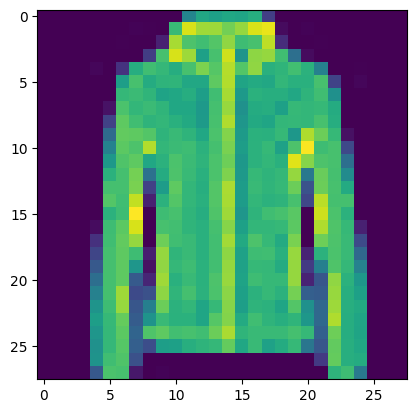

In [9]:
%matplotlib inline
image,label = trainingdata[np.random.randint(60000)]

plt.imshow(image.squeeze().numpy())
plt.show()

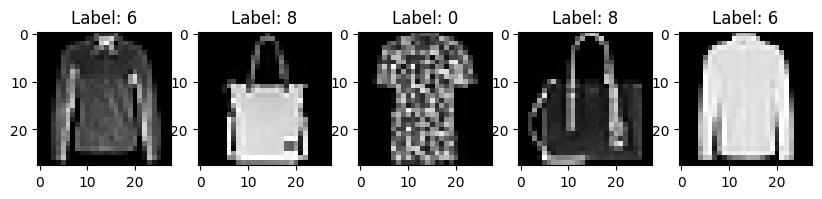

In [10]:
# loading data in batches through dataloader module of pytorch just to avoid crashing of the gpu due to high volume of data supplied at the same time.
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)
images, labels = next(iter(trainDataLoader))

plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.title(f'Label: {labels[index].item()}')
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)
